In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'Data\sales_performance_dataset.csv')

In [5]:
df.head(20)

,Transaction_ID,Date,Region,Employee_ID,Employee_Name,Product_Category,Product_Subcategory,Product_Price,Units_Sold,Discount_Applied,Employee_Performance_Score,Return_Status,Revenue
0,1,2024-10-09,East,101,Anthony Wilson,Clothing,Smartphones,293,3,15,6,No,747.15
1,2,2024-06-09,West,103,Anne Ho,Clothing,Tables,339,8,25,10,No,2034.00
2,3,2024-04-09,North,118,Katelyn Parker,Appliances,Laptops,357,4,20,8,No,1142.40
3,4,2024-04-11,East,110,Adam Watkins,Furniture,Smartphones,385,2,0,3,No,770.00
4,5,2024-11-17,East,103,Rebecca Johnson,Appliances,Washing Machines,514,2,0,10,No,1028.00
5,6,2024-09-03,West,108,Jack Brown,Electronics,Smartphones,626,1,25,1,No,469.50
6,7,2023-12-23,North,114,Dana Jackson,Appliances,Tables,185,4,15,9,Yes,629.00
7,8,2024-04-06,North,118,Laura Perez,Electronics,Laptops,563,9,15,1,No,4306.95
8,9,2024-05-04,East,115,Emily Armstrong,Appliances,Sofas,30,7,10,3,No,189.00
9,10,2024-12-14,South,102,Barbara Heath,Furniture,Washing Machines,320,7,25,8,No,1680.00


In [10]:
discount_revenue = df.groupby('Discount_Applied')['Revenue'].sum().reset_index()

# Sort by discount to see the trend
discount_revenue_sorted = discount_revenue.sort_values(by='Discount_Applied')

print("Revenue Impact by Discount Level:")
print(discount_revenue_sorted)
print("\n")

Revenue Impact by Discount Level:
   Discount_Applied    Revenue
0                 0  207358.00
1                 5  169812.50
2                10  186418.80
3                15  206115.65
4                20  170484.80
5                25  200865.75




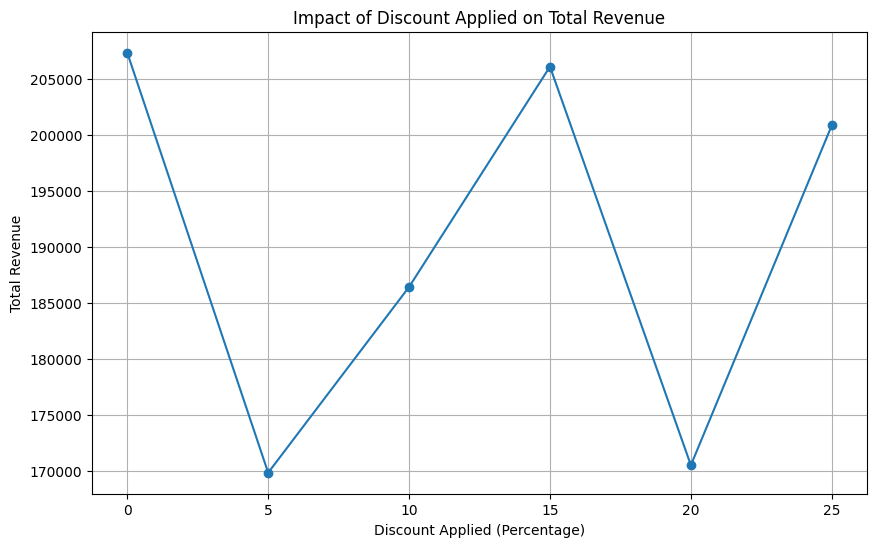

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(discount_revenue_sorted['Discount_Applied'], discount_revenue_sorted['Revenue'], marker='o', linestyle='-')
plt.title('Impact of Discount Applied on Total Revenue')
plt.xlabel('Discount Applied (Percentage)')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(ticks=sorted(df['Discount_Applied'].unique())) # Ensure all discount levels are on x-axis
plt.show()

Correlation between Discount Applied and Revenue: -0.0435




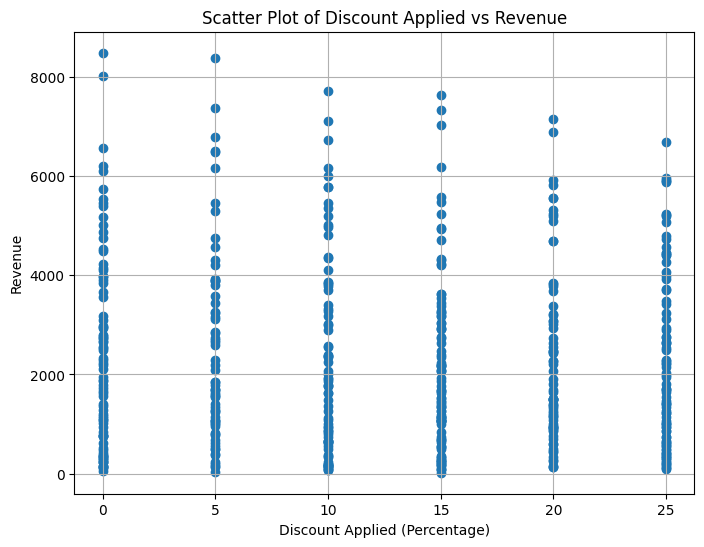

In [12]:
correlation = df['Discount_Applied'].corr(df['Revenue'])
print(f"Correlation between Discount Applied and Revenue: {correlation:.4f}")
print("\n")

# Visualize the relationship with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Discount_Applied'], df['Revenue'])
plt.title('Scatter Plot of Discount Applied vs Revenue')
plt.xlabel('Discount Applied (Percentage)')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

Revenue by Discount Range:
  Discount_Range    Revenue
0             0%  207358.00
1             5%  169812.50
2            10%  186418.80
3            15%  206115.65
4            20%  170484.80
5            25%  200865.75




C:\Users\Aagab\AppData\Local\Temp\ipykernel_22860\4158197002.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_revenue = df.groupby('Discount_Range')['Revenue'].sum().reset_index()


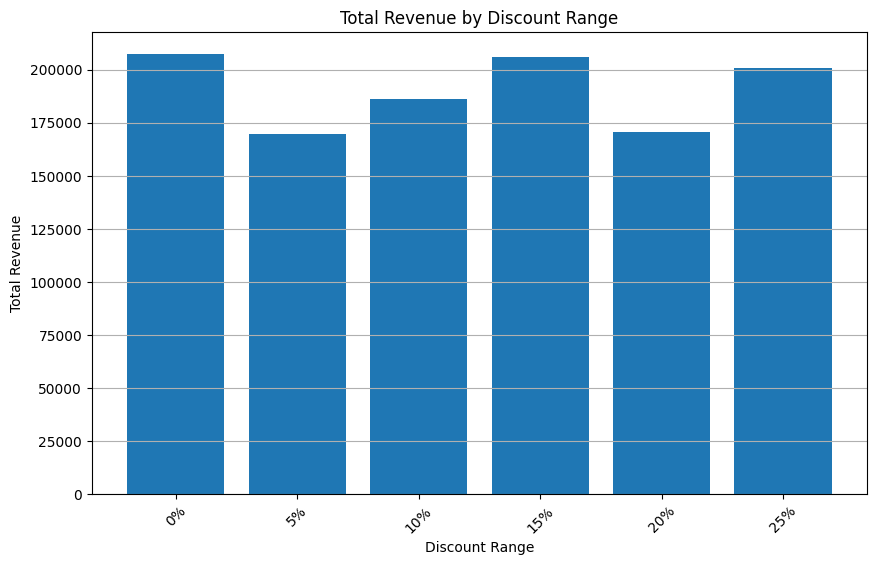

In [23]:
bins = [-0.5, 2.5, 7.5, 12.5, 17.5, 22.5, 27.5]
labels = ['0%', '5%', '10%', '15%', '20%', '25%']

df['Discount_Range'] = pd.cut(df['Discount_Applied'], bins=bins, labels=labels, right=True)

# Analyze Revenue by Discount Range
range_revenue = df.groupby('Discount_Range')['Revenue'].sum().reset_index()

print("Revenue by Discount Range:")
print(range_revenue)
print("\n")

# Visualize Revenue by Discount Range (Bar plot for categorical ranges)
plt.figure(figsize=(10, 6))
plt.bar(range_revenue['Discount_Range'], range_revenue['Revenue'])
plt.title('Total Revenue by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Total Revenue Generated by Each Employee:
     Employee_ID      Employee_Name  Total_Revenue
0            101  Anthony Alexander        2275.20
1            101     Anthony Powell        1055.70
2            101     Anthony Wilson         747.15
3            101       Briana Jones        1010.80
4            101    Carrie Hatfield        2541.00
..           ...                ...            ...
495          119        Shelby Hall        6682.50
496          119       Steven White        1210.00
497          119     Thomas Collins        1005.75
498          119      Tiffany Evans        6208.00
499          119      Wendy Barajas        1995.00

[500 rows x 3 columns]

Total Revenue Generated by Each Employee (Sorted by Revenue):
     Employee_ID      Employee_Name  Total_Revenue
491          119     Melissa Haynes        8487.00
170          107      Andrew Booker        8387.55
438          117        Paul Hinton        8019.00
126          105       Jessica Yang        7719.30
362 

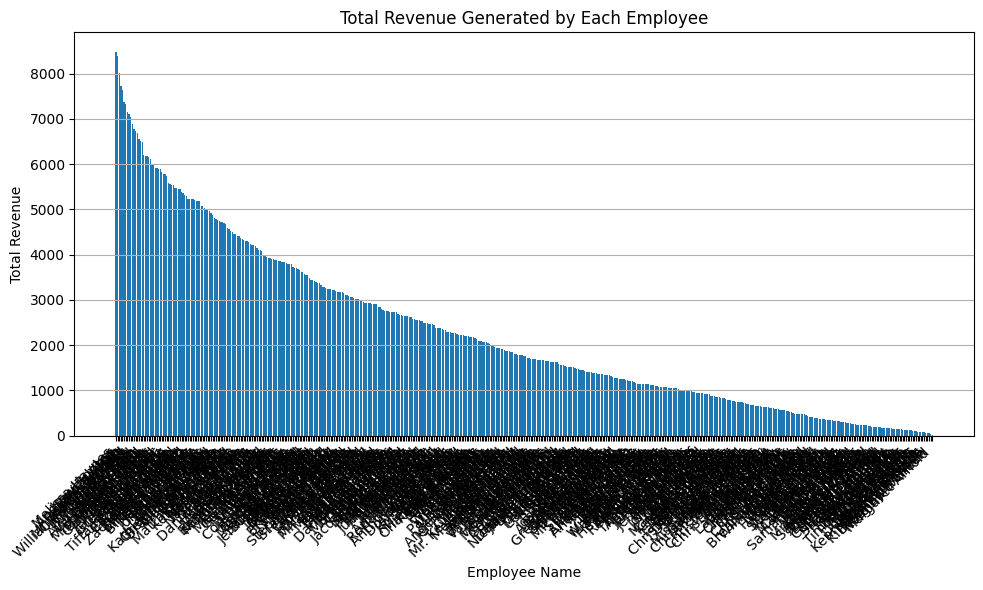

In [14]:
employee_revenue = df.groupby(['Employee_ID', 'Employee_Name'])['Revenue'].sum().reset_index()

# Rename the 'Revenue' column to 'Total_Revenue' for clarity
employee_revenue.rename(columns={'Revenue': 'Total_Revenue'}, inplace=True)

# Print the result
print("Total Revenue Generated by Each Employee:")
print(employee_revenue)

# --- Optional: Sort by Total Revenue ---
employee_revenue_sorted = employee_revenue.sort_values(by='Total_Revenue', ascending=False)
print("\nTotal Revenue Generated by Each Employee (Sorted by Revenue):")
print(employee_revenue_sorted)

# --- Optional: Visualize (Bar Chart) ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(employee_revenue_sorted['Employee_Name'], employee_revenue_sorted['Total_Revenue'])
plt.xlabel('Employee Name')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Generated by Each Employee')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.grid(axis='y')
plt.show()

Correlation between Employee Performance Score and Revenue: 0.0176




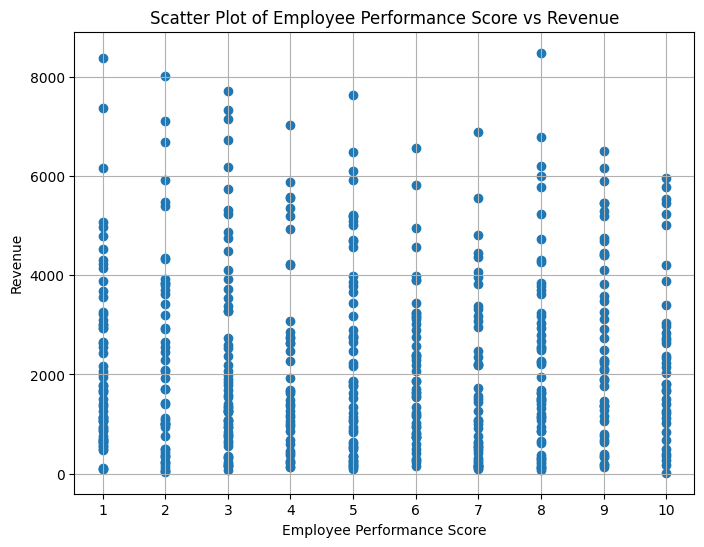

In [15]:
correlation = df['Employee_Performance_Score'].corr(df['Revenue'])
print(f"Correlation between Employee Performance Score and Revenue: {correlation:.4f}")
print("\n")

# 2. Visualize the Relationship with a Scatter Plot

plt.figure(figsize=(8, 6))
plt.scatter(df['Employee_Performance_Score'], df['Revenue'])
plt.title('Scatter Plot of Employee Performance Score vs Revenue')
plt.xlabel('Employee Performance Score')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(ticks=sorted(df['Employee_Performance_Score'].unique())) # Ensure all score levels are on x-axis
plt.show()


Average Revenue by Employee Performance Score Range:
  Performance_Score_Range      Revenue
0                       1  2235.360656
1                       2  2322.678000
2                       3  2330.355000
3                       4  2231.342683
4                       5  2369.064286
5                       6  2120.156122
6                       7  1848.534444
7                       8  2316.562037
8                       9  2656.890217
9                      10  2373.885526




C:\Users\Aagab\AppData\Local\Temp\ipykernel_22860\1419939120.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_revenue = df.groupby('Performance_Score_Range')['Revenue'].mean().reset_index() # Using mean revenue for each range


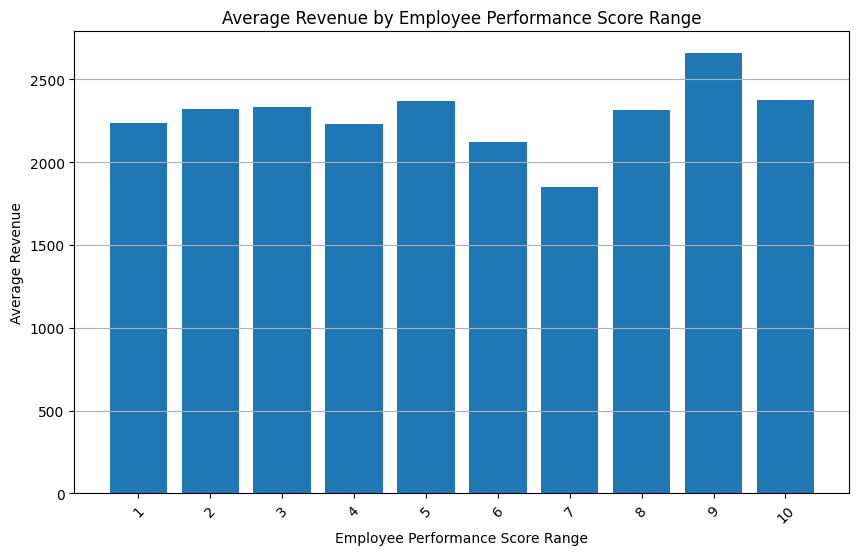

In [19]:
# Define performance score ranges (adjust bins and labels as needed based on your score scale)
bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5]
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'] # Example labels corresponding to bins

df['Performance_Score_Range'] = pd.cut(df['Employee_Performance_Score'], bins=bins, labels=labels, right=False, include_lowest=True)

# Analyze Revenue by Performance Score Range
range_revenue = df.groupby('Performance_Score_Range')['Revenue'].mean().reset_index() # Using mean revenue for each range

print("Average Revenue by Employee Performance Score Range:")
print(range_revenue)
print("\n")

# Visualize Average Revenue by Performance Score Range (Bar plot)
plt.figure(figsize=(10, 6))
plt.bar(range_revenue['Performance_Score_Range'], range_revenue['Revenue'])
plt.title('Average Revenue by Employee Performance Score Range')
plt.xlabel('Employee Performance Score Range')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [25]:
range_revenue = df.groupby('Performance_Score_Range')['Revenue'].mean().reset_index()
print(range_revenue)

  Performance_Score_Range      Revenue
0                       1  2235.360656
1                       2  2322.678000
2                       3  2330.355000
3                       4  2231.342683
4                       5  2369.064286
5                       6  2120.156122
6                       7  1848.534444
7                       8  2316.562037
8                       9  2656.890217
9                      10  2373.885526


C:\Users\Aagab\AppData\Local\Temp\ipykernel_22860\2922119419.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range_revenue = df.groupby('Performance_Score_Range')['Revenue'].mean().reset_index()


In [26]:
df.head()

,Transaction_ID,Date,Region,Employee_ID,Employee_Name,Product_Category,Product_Subcategory,Product_Price,Units_Sold,Discount_Applied,Employee_Performance_Score,Return_Status,Revenue,Discount_Range,Performance_Score_Range
0,1,2024-10-09,East,101,Anthony Wilson,Clothing,Smartphones,293,3,15,6,No,747.15,15%,6
1,2,2024-06-09,West,103,Anne Ho,Clothing,Tables,339,8,25,10,No,2034.00,25%,10
2,3,2024-04-09,North,118,Katelyn Parker,Appliances,Laptops,357,4,20,8,No,1142.40,20%,8
3,4,2024-04-11,East,110,Adam Watkins,Furniture,Smartphones,385,2,0,3,No,770.00,0%,3
4,5,2024-11-17,East,103,Rebecca Johnson,Appliances,Washing Machines,514,2,0,10,No,1028.00,0%,10


Average Discount Percentage per Product Category:
  Product_Category  Average_Discount_Percentage
0       Appliances                  1301.724138
1         Clothing                  1210.317460
2      Electronics                  1291.338583
3        Furniture                  1309.160305


Product Category Performance with Discount and Revenue Metrics:
  Product_Category  Average_Discount_Percentage  Total_Revenue  \
0       Appliances                  1301.724138      265770.70   
1         Clothing                  1210.317460      283182.85   
2      Electronics                  1291.338583      270567.00   
3        Furniture                  1309.160305      321534.95   

   Average_Revenue  
0      2291.126724  
1      2247.482937  
2      2130.448819  
3      2454.465267  




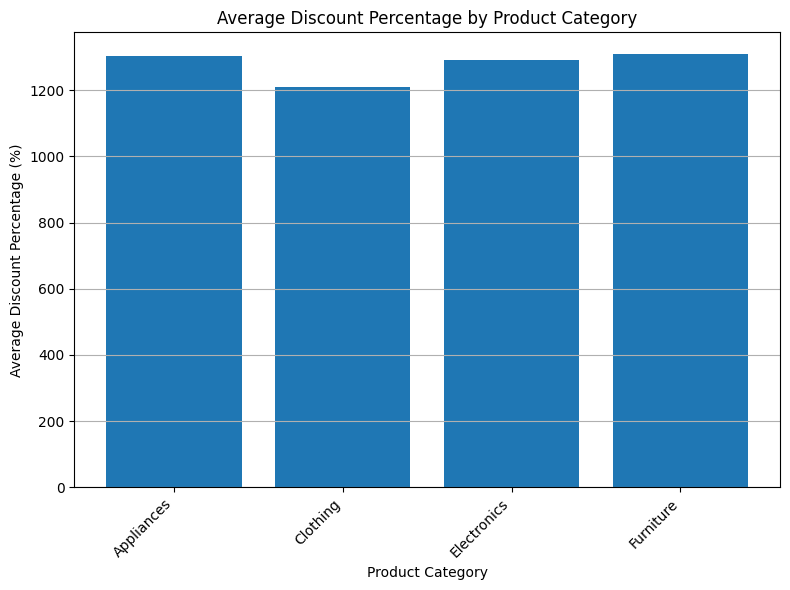

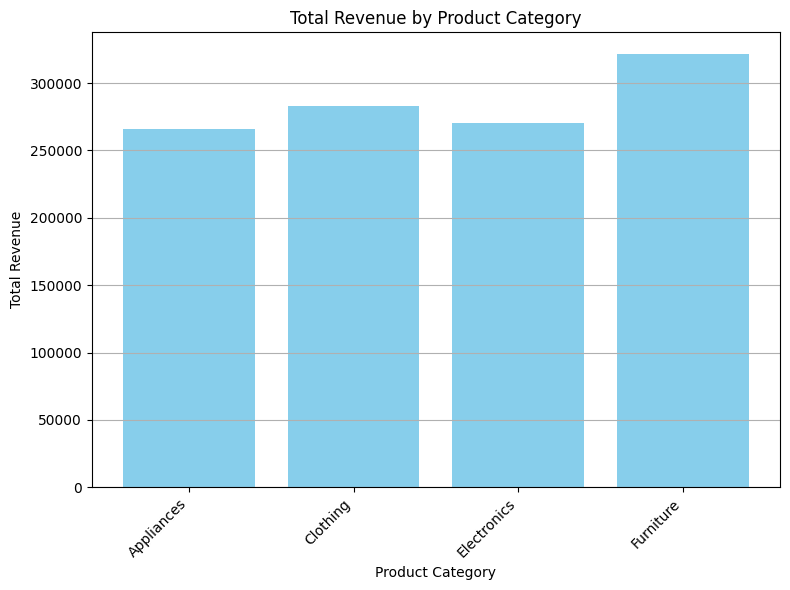

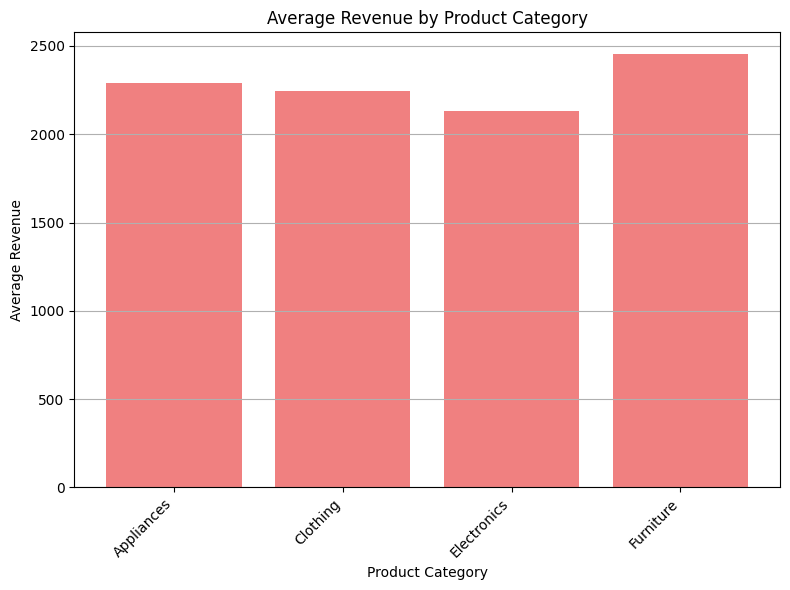

In [27]:
category_avg_discount = df.groupby('Product_Category')['Discount_Applied'].mean().reset_index()
category_avg_discount.rename(columns={'Discount_Applied': 'Average_Discount_Percentage'}, inplace=True)
category_avg_discount['Average_Discount_Percentage'] = category_avg_discount['Average_Discount_Percentage'] * 100 # Convert to percentage for better readability

print("Average Discount Percentage per Product Category:")
print(category_avg_discount)
print("\n")

# 2. Analyze Impact on Revenue

# Calculate Total Revenue per Product Category
category_total_revenue = df.groupby('Product_Category')['Revenue'].sum().reset_index()
category_total_revenue.rename(columns={'Revenue': 'Total_Revenue'}, inplace=True)

# Calculate Average Revenue per Transaction per Product Category (optional, but can be insightful)
category_avg_revenue = df.groupby('Product_Category')['Revenue'].mean().reset_index()
category_avg_revenue.rename(columns={'Revenue': 'Average_Revenue'}, inplace=True)

# Merge all results into a single DataFrame for easy comparison
category_performance = pd.merge(category_avg_discount, category_total_revenue, on='Product_Category')
category_performance = pd.merge(category_performance, category_avg_revenue, on='Product_Category')

print("Product Category Performance with Discount and Revenue Metrics:")
print(category_performance)
print("\n")


# --- Visualizations ---

# Bar Plot: Average Discount Percentage per Category
plt.figure(figsize=(8, 6))
plt.bar(category_performance['Product_Category'], category_performance['Average_Discount_Percentage'])
plt.xlabel('Product Category')
plt.ylabel('Average Discount Percentage (%)')
plt.title('Average Discount Percentage by Product Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar Plot: Total Revenue per Category
plt.figure(figsize=(8, 6))
plt.bar(category_performance['Product_Category'], category_performance['Total_Revenue'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Bar Plot: Average Revenue per Category
plt.figure(figsize=(8, 6))
plt.bar(category_performance['Product_Category'], category_performance['Average_Revenue'], color='lightcoral')
plt.xlabel('Product Category')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Product Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [31]:
df.head()

,Transaction_ID,Date,Region,Employee_ID,Employee_Name,Product_Category,Product_Subcategory,Product_Price,Units_Sold,Discount_Applied,Employee_Performance_Score,Return_Status,Revenue,Discount_Range,Performance_Score_Range,Is_Returned
0,1,2024-10-09,East,101,Anthony Wilson,Clothing,Smartphones,293,3,15,6,No,747.15,15%,6,0
1,2,2024-06-09,West,103,Anne Ho,Clothing,Tables,339,8,25,10,No,2034.00,25%,10,0
2,3,2024-04-09,North,118,Katelyn Parker,Appliances,Laptops,357,4,20,8,No,1142.40,20%,8,0
3,4,2024-04-11,East,110,Adam Watkins,Furniture,Smartphones,385,2,0,3,No,770.00,0%,3,0
4,5,2024-11-17,East,103,Rebecca Johnson,Appliances,Washing Machines,514,2,0,10,No,1028.00,0%,10,0


Return Rate by Discount Level:
   Discount_Applied  Return_Rate
0                 0     5.813953
1                 5    14.492754
2                10     8.536585
3                15    13.265306
4                20     9.459459
5                25     4.395604




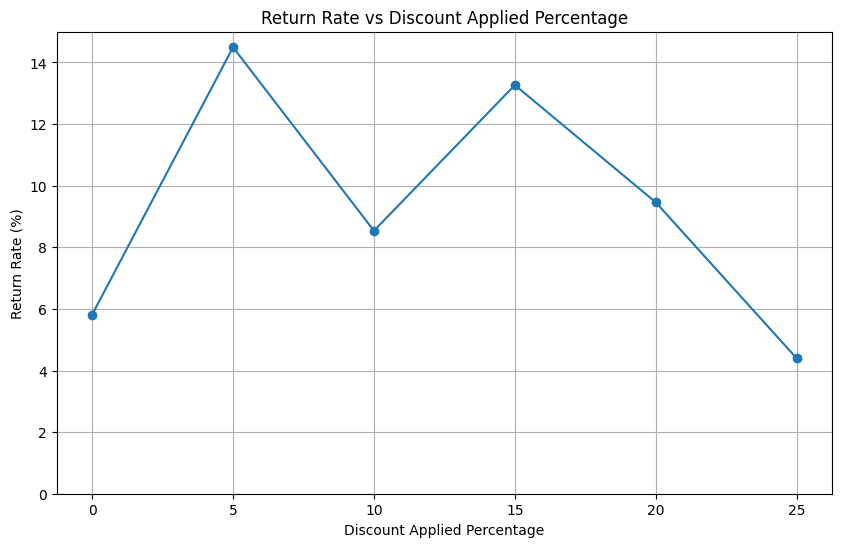

Correlation between Discount Applied Percentage and Return Status (Return Rate proxy): -0.0265




In [33]:
df["Is_Returned"] = df["Return_Status"].apply(lambda x: 1 if x.lower() == "yes" else 0)

# Group by Discount Applied and calculate the Return Rate (mean of 'Is_Returned')
discount_return_rate = df.groupby('Discount_Applied')['Is_Returned'].mean().reset_index()
discount_return_rate.rename(columns={'Is_Returned': 'Return_Rate'}, inplace=True)
discount_return_rate['Return_Rate'] = discount_return_rate['Return_Rate'] * 100 # Convert to percentage for readability

print("Return Rate by Discount Level:")
print(discount_return_rate)
print("\n")

# 2. Visualize Return Rate by Discount Level

plt.figure(figsize=(10, 6))
plt.plot(discount_return_rate['Discount_Applied'], discount_return_rate['Return_Rate'], marker='o', linestyle='-')
plt.title('Return Rate vs Discount Applied Percentage')
plt.xlabel('Discount Applied Percentage')
plt.ylabel('Return Rate (%)')
plt.grid(True)
plt.xticks(ticks=sorted(df['Discount_Applied'].unique())) # Ensure all discount levels are on x-axis
plt.ylim(bottom=0) # Ensure y-axis starts from 0
plt.show()

# 3. Assess Correlation (Optional)

correlation = df['Discount_Applied'].corr(df['Is_Returned']) # Correlation with the boolean 'Is_Returned'
print(f"Correlation between Discount Applied Percentage and Return Status (Return Rate proxy): {correlation:.4f}")
print("\n")

In [34]:
df.head()

,Transaction_ID,Date,Region,Employee_ID,Employee_Name,Product_Category,Product_Subcategory,Product_Price,Units_Sold,Discount_Applied,Employee_Performance_Score,Return_Status,Revenue,Discount_Range,Performance_Score_Range,Is_Returned
0,1,2024-10-09,East,101,Anthony Wilson,Clothing,Smartphones,293,3,15,6,No,747.15,15%,6,0
1,2,2024-06-09,West,103,Anne Ho,Clothing,Tables,339,8,25,10,No,2034.00,25%,10,0
2,3,2024-04-09,North,118,Katelyn Parker,Appliances,Laptops,357,4,20,8,No,1142.40,20%,8,0
3,4,2024-04-11,East,110,Adam Watkins,Furniture,Smartphones,385,2,0,3,No,770.00,0%,3,0
4,5,2024-11-17,East,103,Rebecca Johnson,Appliances,Washing Machines,514,2,0,10,No,1028.00,0%,10,0


Total Daily Revenue:
          Date   Revenue
0   2023-12-23   1406.00
1   2023-12-24    318.00
2   2023-12-25   8485.80
3   2023-12-26   4956.35
4   2023-12-27   9367.95
..         ...       ...
265 2024-12-17  15104.80
266 2024-12-18   2748.90
267 2024-12-19   6030.65
268 2024-12-21    360.00
269 2024-12-22   9329.85

[270 rows x 2 columns]




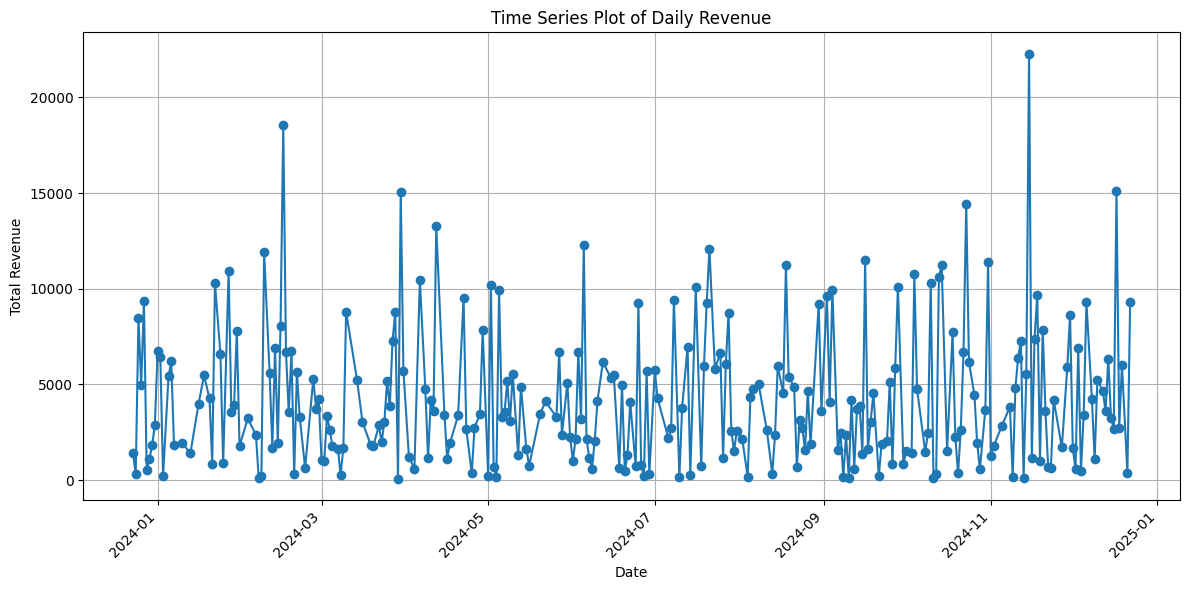

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

daily_revenue = df.groupby('Date')['Revenue'].sum().reset_index()
daily_revenue = daily_revenue.sort_values(by='Date') # Ensure chronological order

print("Total Daily Revenue:")
print(daily_revenue)
print("\n")

# 2. Create a Time-Series Plot

plt.figure(figsize=(12, 6))
plt.plot(daily_revenue['Date'], daily_revenue['Revenue'], marker='o', linestyle='-')
plt.title('Time Series Plot of Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

Total Daily Revenue:
          Date   Revenue
0   2023-12-23   1406.00
1   2023-12-24    318.00
2   2023-12-25   8485.80
3   2023-12-26   4956.35
4   2023-12-27   9367.95
..         ...       ...
265 2024-12-17  15104.80
266 2024-12-18   2748.90
267 2024-12-19   6030.65
268 2024-12-21    360.00
269 2024-12-22   9329.85

[270 rows x 2 columns]




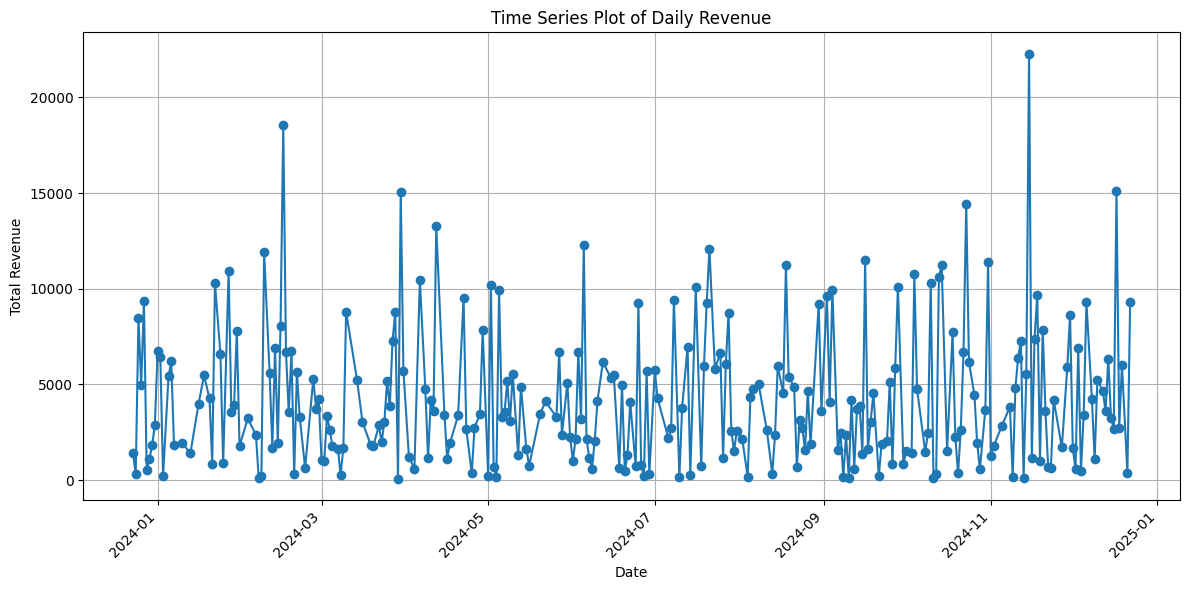

Average Revenue by Day of the Week (Sorted):
Day_of_Week
Monday       5202.193243
Friday       5066.776471
Sunday       4048.821795
Wednesday    3927.628947
Tuesday      3880.787500
Thursday     3851.435526
Saturday     3808.271591
Name: Revenue, dtype: float64

The Day of the Week with the Highest Average Revenue is: Monday (5202.19)




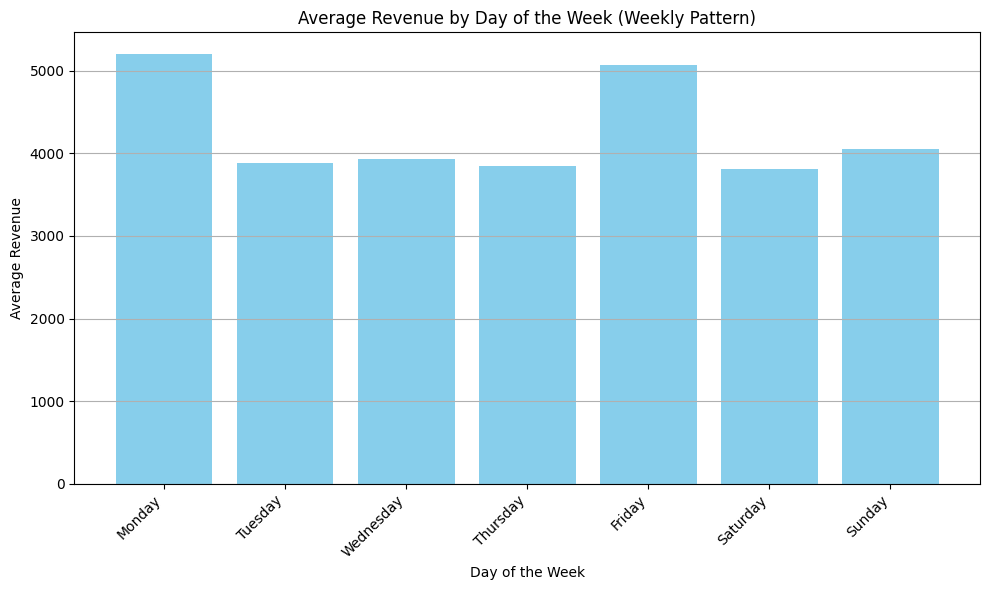


--- Interpretation ---
Examine the Time Series Plot of Daily Revenue to visually identify trends, seasonality, or any anomalies over time.
From 'Average Revenue by Day of the Week', identify the day with the highest revenue. This suggests the most profitable day of the week on average.
The Bar plot 'Average Revenue by Day of the Week' visually represents the typical weekly sales pattern. Look for peaks and troughs to understand which days consistently perform better or worse.

Possible interpretations of seasonal patterns:
- Higher revenue on weekends (Saturday/Sunday) might indicate strong weekend sales.
- Higher revenue on weekdays (e.g., Friday) could be due to end-of-week shopping or specific weekday promotions.
- Consistently lower revenue on certain days might indicate days to focus on promotions or different strategies.

To explore longer-term seasonal patterns (e.g., monthly or yearly), you would need a dataset spanning a longer time period and adjust the grouping and plotting

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume your data is in a Pandas DataFrame called 'df'
# If not, you need to load your data into a DataFrame first
# For example, if your data is in a CSV file:
# df = pd.read_csv('your_data_file.csv')

# Sample DataFrame (replace this with your actual data loading)


# 1. Calculate Total Daily Revenue

# Convert 'Date' column to datetime objects if it's not already
df['Date'] = pd.to_datetime(df['Date'])

daily_revenue = df.groupby('Date')['Revenue'].sum().reset_index()
daily_revenue = daily_revenue.sort_values(by='Date') # Ensure chronological order

print("Total Daily Revenue:")
print(daily_revenue)
print("\n")

# 2. Create a Time-Series Plot

plt.figure(figsize=(12, 6))
plt.plot(daily_revenue['Date'], daily_revenue['Revenue'], marker='o', linestyle='-')
plt.title('Time Series Plot of Daily Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()


# 3. Identify Day of the Week with Highest Revenue

# Extract Day of the Week Name
daily_revenue['Day_of_Week'] = daily_revenue['Date'].dt.day_name()

# Group by Day of Week and Calculate Average Revenue (using average to normalize for potentially different numbers of each day in data)
day_of_week_revenue = daily_revenue.groupby('Day_of_Week')['Revenue'].mean().sort_values(ascending=False) # Using mean for average daily revenue by day of week

print("Average Revenue by Day of the Week (Sorted):")
print(day_of_week_revenue)
highest_revenue_day = day_of_week_revenue.index[0] # Get the day with the highest average revenue
highest_revenue_value = day_of_week_revenue.iloc[0]
print(f"\nThe Day of the Week with the Highest Average Revenue is: {highest_revenue_day} ({highest_revenue_value:.2f})")
print("\n")


# 4. Explore Seasonal Patterns (Weekly Pattern Visualization)

# Reorder days of the week for plotting to start from Monday or Sunday (e.g., Monday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_revenue_ordered = day_of_week_revenue.reindex(day_order) # Reindex to ensure correct order

# Bar plot of Average Revenue by Day of Week
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_revenue_ordered.index, day_of_week_revenue_ordered.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Day of the Week (Weekly Pattern)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# --- Interpretation of Results ---

print("\n--- Interpretation ---")
print("Examine the Time Series Plot of Daily Revenue to visually identify trends, seasonality, or any anomalies over time.")
print("From 'Average Revenue by Day of the Week', identify the day with the highest revenue. This suggests the most profitable day of the week on average.")
print("The Bar plot 'Average Revenue by Day of the Week' visually represents the typical weekly sales pattern. Look for peaks and troughs to understand which days consistently perform better or worse.")
print("\nPossible interpretations of seasonal patterns:")
print("- Higher revenue on weekends (Saturday/Sunday) might indicate strong weekend sales.")
print("- Higher revenue on weekdays (e.g., Friday) could be due to end-of-week shopping or specific weekday promotions.")
print("- Consistently lower revenue on certain days might indicate days to focus on promotions or different strategies.")
print("\nTo explore longer-term seasonal patterns (e.g., monthly or yearly), you would need a dataset spanning a longer time period and adjust the grouping and plotting accordingly (e.g., group by month, plot monthly revenue over years).")

Return Rate by Region:
  Region  Total_Transactions  Returned_Transactions  Return_Rate
0   East                 122                      7     5.737705
1  North                 122                     10     8.196721
2  South                 108                     13    12.037037
3   West                 148                     16    10.810811

Return Rate by Product Category:
  Product_Category  Total_Transactions  Returned_Transactions  Return_Rate
0       Appliances                 116                     12    10.344828
3        Furniture                 131                     13     9.923664
1         Clothing                 126                     11     8.730159
2      Electronics                 127                     10     7.874016

Return Rate by Discount Percentage:
   Discount_Applied  Return_Rate
0                 0     5.813953
1                 5    14.492754
2                10     8.536585
3                15    13.265306
4                20     9.459459
5       

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Aagab\AppData\Local\Temp\ipykernel_19516\2475244167.py:4: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Data\sales_performance_dataset.csv')


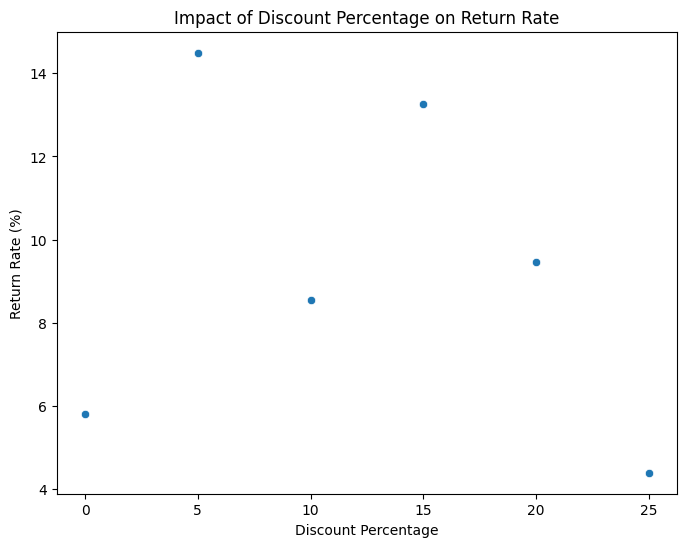

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Data\sales_performance_dataset.csv')

# 1. Calculate the return rate for each region
# Filter returned transactions
returned_transactions = df[df['Return_Status'] == 'Yes']

# Calculate total transactions and returned transactions by region
total_transactions_by_region = df.groupby('Region').size().reset_index(name='Total_Transactions')
returned_transactions_by_region = returned_transactions.groupby('Region').size().reset_index(name='Returned_Transactions')

# Merge the two dataframes
return_rate_by_region = pd.merge(total_transactions_by_region, returned_transactions_by_region, on='Region', how='left')

# Calculate return rate (percentage of returned transactions)
return_rate_by_region['Return_Rate'] = (return_rate_by_region['Returned_Transactions'] / return_rate_by_region['Total_Transactions']) * 100

# Fill NaN values with 0 (if no returns in a region)
return_rate_by_region['Return_Rate'] = return_rate_by_region['Return_Rate'].fillna(0)

print("Return Rate by Region:")
print(return_rate_by_region)

# 2. Identify the product categories with the highest return rates
# Calculate total transactions and returned transactions by product category
total_transactions_by_category = df.groupby('Product_Category').size().reset_index(name='Total_Transactions')
returned_transactions_by_category = returned_transactions.groupby('Product_Category').size().reset_index(name='Returned_Transactions')

# Merge the two dataframes
return_rate_by_category = pd.merge(total_transactions_by_category, returned_transactions_by_category, on='Product_Category', how='left')

# Calculate return rate (percentage of returned transactions)
return_rate_by_category['Return_Rate'] = (return_rate_by_category['Returned_Transactions'] / return_rate_by_category['Total_Transactions']) * 100

# Fill NaN values with 0 (if no returns in a category)
return_rate_by_category['Return_Rate'] = return_rate_by_category['Return_Rate'].fillna(0)

# Sort by return rate to identify the highest
return_rate_by_category = return_rate_by_category.sort_values(by='Return_Rate', ascending=False)

print("\nReturn Rate by Product Category:")
print(return_rate_by_category)

# 3. Analyze if higher discounts result in higher return rates
# Group by discount percentage and calculate return rate
discount_return_analysis = df.groupby('Discount_Applied')['Return_Status'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index(name='Return_Rate')

# Sort by discount percentage
discount_return_analysis = discount_return_analysis.sort_values(by='Discount_Applied')

print("\nReturn Rate by Discount Percentage:")
print(discount_return_analysis)

# Visualize the relationship between discount percentage and return rate
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount_Applied', y='Return_Rate', data=discount_return_analysis)
plt.title('Impact of Discount Percentage on Return Rate')
plt.xlabel('Discount Percentage')
plt.ylabel('Return Rate (%)')
plt.show()